In [16]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from PIL import Image


from pathlib import Path
import json
import shutil

os.getcwd()
!pwd



/usr/users/vogg/monkey-tracking-in-the-wild/notebooks


## Converting VoTT output

After labeling with VoTT, we obtain a .csv file, which we convert into many .txt files, one file for every frame. These will be saved in a folder called labels_with_ids (if it does not exist you have to create it.

### Paths to everything

#### Path Lemur ID

In [4]:
data_root = Path("/usr/users/vogg/Labelling/Lemurs/Individual_imgs/")

### Test output of labels

In [5]:
labels = pd.read_csv(data_root / 'Individuals_alpha-export.csv')

In [6]:
labels.head()

,image,xmin,ymin,xmax,ymax,label
0,a_e_1_220918_c1_3002.jpg,1839.910745,656.694558,1920.000000,776.853520,Lemur-Unsure
1,a_e_1_220918_c1_3002.jpg,1079.061518,566.575364,1591.061453,944.217715,Lemur-Unsure
2,a_e_1_220918_c1_3002.jpg,672.893898,606.628333,1016.134122,899.873366,Box-Unsure
3,a_e_1_220918_c1_3002.jpg,1535.642458,668.138311,1794.145208,902.980132,Box-Unsure
4,a_e_1_220918_c2_15197.jpg,484.111765,357.727649,1018.994413,745.383256,Lemur-Redonda


### Fixing paths to image and label files

In [29]:
img_list = os.listdir(data_root / "images")


In [30]:
img_list[0]

'a_e_9_221007_c2_5151.jpg'

### Get image shapes

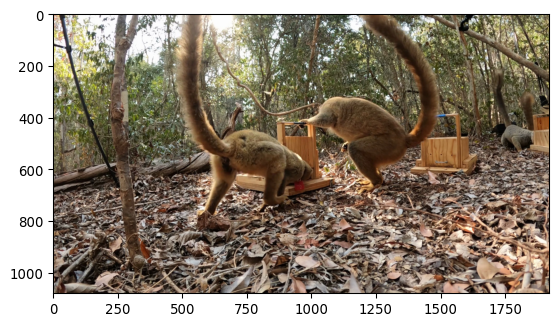

In [17]:
# img_id = img_list[1]
img_path = next(img_list)
# img = np.asarray(Image.open(data_root + "images/" + img_id))
img = np.asarray(Image.open(img_path))
fig, ax = plt.subplots(figsize=(640/96, 640/96), dpi=96)
ax.imshow(img)
img_h, img_w, _ = img.shape

# Extracting one csv VoTT output for multi-class FairMOT

- used for lemurs and boxes

In [13]:
i_obj = [0,0]
img_paths = []
for _, row in labels.iterrows():
    # print(label)
    image, xmin, ymin, xmax, ymax, label = row

    image_path = data_out / 'images' / image
    img_paths.append(str(image_path))
    # print(image_path)
    img = np.asarray(Image.open(image_path))
    img_h, img_w, _ = img.shape

    # for lemur and box ---
    # img_h, img_w = [2160, 3840]


    # label_fpath = (data_out / 'labels' / image_path.name).with_suffix('.txt')
    # for exp room
    label_fpath = (data_out / 'labels_with_ids' / image_path.name).with_suffix('.txt')
    
    obj_class = 0

    # for lemur and box ---
    # if "Lemur" in label:
    #     obj_class = 0
    # elif "Box" in label:
    #     obj_class = 1

    w = (xmax - xmin)
    h = (ymax - ymin)

    x_center = xmin + w / 2
    y_center = ymin + h / 2

    #  img_id = re.sub("[.]jpg","", img_id)
    #Label-String schreiben.

    label_str = '{:d} {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
            obj_class, i_obj[obj_class], x_center / img_w, y_center / img_h, w / img_w, h / img_h)

    i_obj[obj_class] += 1

    # not for lemur box
    with label_fpath.open(mode='a') as f:
        f.write(label_str)

# for lemur box
# img_paths = list(set(img_paths))
# with (data_out / 'lemur_box.train').open('w') as f:
#     for ip in img_paths:
#         f.write(f'{ip}\n')

## Extracting one csv VoTT output for multi-class FairMOT + classification



In [18]:

dict_indivs = {'Cha': 0, 'Flo': 1, 'Gen': 2, 'Geo': 3, 'Her': 4, 'Rab': 5, 'Red': 6,
              'Uns': 7}

i_obj = [0,0]
img_paths = []
for _, row in labels.iterrows():
    # print(label)
    image, xmin, ymin, xmax, ymax, label = row
    indiv = label.split("-")[1][:3]

    image_path = data_root / 'images' / image
    img_paths.append(str(image_path))
    # print(image_path)
    img = np.asarray(Image.open(image_path))
    img_h, img_w, _ = img.shape

    # for lemur and box ---
    # img_h, img_w = [2160, 3840]


    # label_fpath = (data_out / 'labels' / image_path.name).with_suffix('.txt')
    # for exp room
    label_fpath = (data_root / 'labels_with_ids' / image_path.name).with_suffix('.txt')
    
    obj_class = 0

    # for lemur and box ---
    if "Lemur" in label:
        obj_class = 0
    elif "Box" in label:
        obj_class = 1

    w = (xmax - xmin)
    h = (ymax - ymin)

    x_center = xmin + w / 2
    y_center = ymin + h / 2

    #  img_id = re.sub("[.]jpg","", img_id)
    #Label-String schreiben.

    label_str = '{:d} {:d} {:.6f} {:.6f} {:.6f} {:.6f} {:d}\n'.format(
            obj_class, i_obj[obj_class], x_center / img_w, y_center / img_h, 
        w / img_w, h / img_h, dict_indivs[indiv])

    i_obj[obj_class] += 1

    # not for lemur box
    with label_fpath.open(mode='a') as f:
        f.write(label_str)
    

# Extracting multiple json VoTT output for single-class FairMOT

- used for testing Zurnas Explorationroom labeling with single class FairMOT 
- all classes labeled in VoTT but only monkey class BB's are extracted

In [ ]:
# cell to extract monkey class
i_monkey = 0
for label in labels_list:
    # print(label)
    with open(label) as f:
        content = json.load(f)
        
    origin_path = Path(content["asset"]["path"])
    image_path_end = Path(origin_path.parent.name, origin_path.name)
    image_path = data_root / label.parent.parent.name  / image_path_end
    # print(image_path)
    # img = np.asarray(Image.open(image_path))
    # img_h, img_w, _ = img.shape
    img_h, img_w = content["asset"]["size"].values()

    all_boxes = content["regions"]
    # print(all_boxes[0])
    monkey_boxes = [box for box in all_boxes if "monkey" in box["tags"]]
    # if monkey_boxes:
    #     shutil.copy(image_path, (data_root / 'images' /image_path.name))
    # print(monkey_boxes)

    label_fpath = (data_root / "labels_with_ids" / image_path.name).with_suffix('.txt')
    # print(label_fpath)

    for monkey_box in monkey_boxes:
        id = monkey_box["id"]
        h, w, left, top = monkey_box["boundingBox"].values()
        # print(h,w,left,top)

        x_center = left + w/2
        y_center = top + h/2

        #  img_id = re.sub("[.]jpg","", img_id)
        #Label-String schreiben.

        label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
                i_monkey, x_center / img_w, y_center / img_h, w / img_w, h / img_h)

        i_monkey += 1
        with label_fpath.open(mode='a') as f:
            f.write(label_str)
    # plotBBox(str(image_path.stem),str(image_path.parent)+'/',str(label_fpath.parent)+'/', ending='.png')
        


# Extracting multiple json VoTT output for multi-class FairMOT

- used for Zurnas Explorationroom labeling

In [68]:
# cell for all classes
i_obj = [0,0,0,0,0]

for label in labels_list:
    # print(label)
    with open(label) as f:
        content = json.load(f)
        
    origin_path = Path(content["asset"]["path"])
    image_path_end = Path(origin_path.parent.name, origin_path.name)
    image_path = data_root / label.parent.parent.name  / image_path_end
    # print(image_path)
    # img = np.asarray(Image.open(image_path))
    # img_h, img_w, _ = img.shape
    img_h, img_w = content["asset"]["size"].values()

    all_boxes = content["regions"]

    # monkey_boxes = [box for box in all_boxes if "monkey" in box["tags"]]

    label_fpath = (data_root / "labels_with_ids" / image_path.name).with_suffix('.txt')

    for box in all_boxes:
        if "monkey" in box["tags"]:
            obj_class = 0
        elif "patch" in box["tags"]:
            obj_class = 1
        elif "kong" in box["tags"]:
            obj_class = 2
        elif "branch" in box["tags"]:
            obj_class = 3
        elif "XBI" in box["tags"]:
            obj_class = 4
        h, w, left, top = box["boundingBox"].values()
        # print(h,w,left,top)

        x_center = left + w/2
        y_center = top + h/2

        #  img_id = re.sub("[.]jpg","", img_id)
        #Label-String schreiben.

        label_str = '{:d} {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
                obj_class, i_obj[obj_class], x_center / img_w, y_center / img_h, w / img_w, h / img_h)

        i_obj[obj_class] += 1
        with label_fpath.open(mode='a') as f:
            f.write(label_str)

### Converting CVAT output

Data comes in separate files.

In [353]:
video_id = 'VID_20210227_133440_0'

data_root = "/usr/users/agecker/datasets/macaque_videos/"

path_o = data_root + video_id + "/obj_train_data/"

frame_list = os.listdir(path_o)
frame_list.sort()

In [354]:
regex = re.compile('.*txt')
frame_list = [i for i in frame_list if regex.match(i)]
print(len(frame_list))

361


In [343]:

!mkdir /usr/users/agecker/datasets/macaque_videos/VID_20210228_153846_0/labels_with_ids/

mkdir: cannot create directory ‘/usr/users/agecker/datasets/macaque_videos/VID_20210228_153846_0/labels_with_ids/’: File exists


In [356]:
!mkdir /usr/users/agecker/datasets/macaque_videos/VID_20210227_133440_0/images/

In [357]:
for frame_id in frame_list:
    text = pd.read_csv(path_o + frame_id, names = [1,2,3,4,5], sep = " ")
    text.insert(0, "z", np.zeros(len(text)))
    text.z = text.z.astype(int)
    text.to_csv(data_root + video_id + "/labels_with_ids/" + frame_id,
                 sep=' ', index=False, header = False)

## Make files for training list images

In [33]:
for img_id in img_list:
    if not img_id.startswith("."):
        label_fpath = "/usr/users/vogg/monkey-tracking-in-the-wild/src/data/lemur_ids.train"

        label_str =  "images/" + img_id + "\n"

        with open(label_fpath, 'a') as f:
            f.write(label_str)

In [ ]:
# my verion
for i, img in enumerate(img_list):
    train_labl_fpath = '/media/gwdg_home/Data/Monkey/02_VoTT/lab.train'
    val_labl_fpath = '/media/gwdg_home/Data/Monkey/02_VoTT/lab.val'
    if i % 10 == 0:
        with open(val_labl_fpath, 'a') as f:
            f.write(str(img) + '\n')
    else:
        with open(train_labl_fpath, 'a') as f:
            f.write(str(img) + '\n')


## Videos to frames

In [358]:
import cv2
import sys
#sys.path

In [359]:
path = "/usr/users/agecker/datasets/macaque_videos/"
cap = cv2.VideoCapture(path + "Videos/" + video_id + ".mp4")

#Total number of frames
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

count = 0

Frame count: 361


In [360]:
#%%

while count < frame_count:
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    success, image = cap.read()
    cv2.imwrite(path + video_id + "/images/frame_%s.jpg" % str(count).zfill(6), image)     # save frame as JPEG file
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
